In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from imview import pltlib
from pygeotools.lib import geolib,iolib,malib,warplib
import os,sys,glob,shutil
from progressbar import ProgressBar
from skimage import exposure

import scipy.ndimage as image
import shapely.wkt
import geopandas as gpd
from pyproj import Proj, transform
import shutil
from subprocess import run,PIPE
import geopandas as gpd
from shapely.geometry import Point, Polygon
import json
from itertools import combinations,compress
from subprocess import run,PIPE
from multiprocessing import Pool,cpu_count
import subprocess
from distutils.spawn import find_executable
import matplotlib.image as mpimg
from demcoreg import coreglib


Bad key "text.kerning_factor" on line 4 in
/nobackup/sbhusha1/sw/miniconda3/envs/bhushan_PY3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

# Co-register WV DEMs over static surface

In [3]:
data_dir = '/nobackup/sbhusha1/skysat_video/paper_analysis/'

In [6]:
! ls $data_dir

19APR28190942-P1BS-010006774010_01_P001_map_rangefilt_0.00-800.00.tif
20190420_coumt_mos.tif
20190420_count_mos.tif
20190420_median_mos.tif
20190420_median_mos_filt.tif
20190420_median_mos_filt_max_nmad2_min_count10.tif
20190420_median_mos_filt_max_nmad4_min_count4.tif
20190420_median_mos_filt_max_nmad5_min_count2.tif
20190420_nmad_mos.tif
20190420_peak_correction_direc-beg_errors.csv
20190420_peak_correction_direc-end_errors.csv
20190420_peak_correction_direc-inverse-transform.txt
20190420_peak_correction_direc-iterationInfo.csv
20190420_peak_correction_direc-log-pc_align-04-11-2054-44415.txt
20190420_peak_correction_direc-log-pc_align-04-11-2116-44903.txt
20190420_peak_correction_direc-log-pc_align-04-11-2322-45538.txt
20190420_peak_correction_direc-trans_source-DEM.tif
20190420_peak_correction_direc-trans_source-log-point2dem-04-11-2055-44486.txt
20190420_peak_correction_direc-trans_source-log-point2dem-04-11-2118-44972.txt
20190420_peak_correction_direc-trans_source-log-point2dem-0

<IPython.core.display.Javascript object>


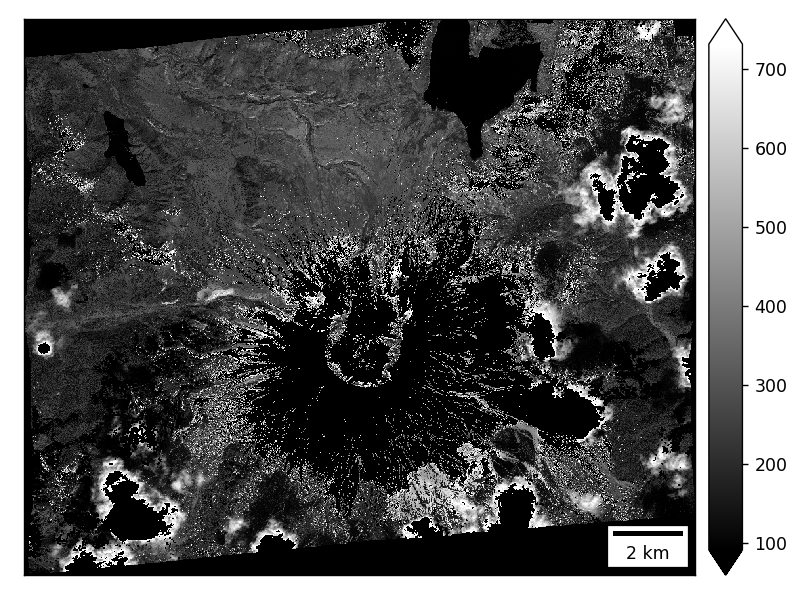

In [10]:
static_surface = os.path.join(data_dir,'19APR28190942-P1BS-010006774010_01_P001_map_rangefilt_0.00-800.00.tif')
fig,ax = plt.subplots()
pltlib.iv_fn(static_surface,full=False,ax=ax,cmap='gray')

<IPython.core.display.Javascript object>


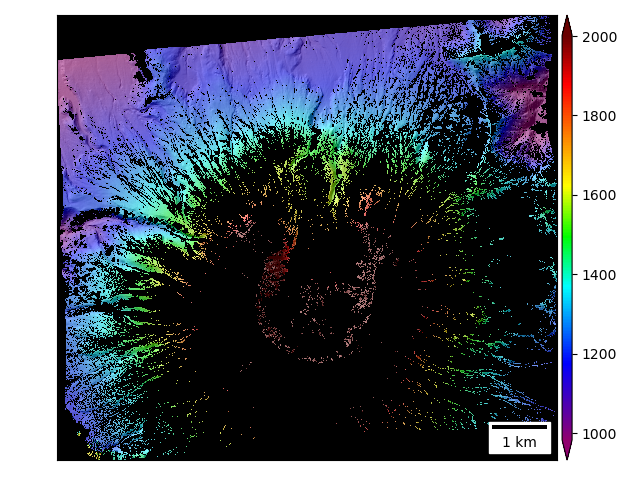

In [40]:
wv_peak_dem_static = os.path.join(data_dir,'mgm_dg_peak_snow_static.tif')
fig,ax = plt.subplots()
pltlib.iv_fn(wv_peak_dem_static,hillshade=True,ax=ax)

<IPython.core.display.Javascript object>


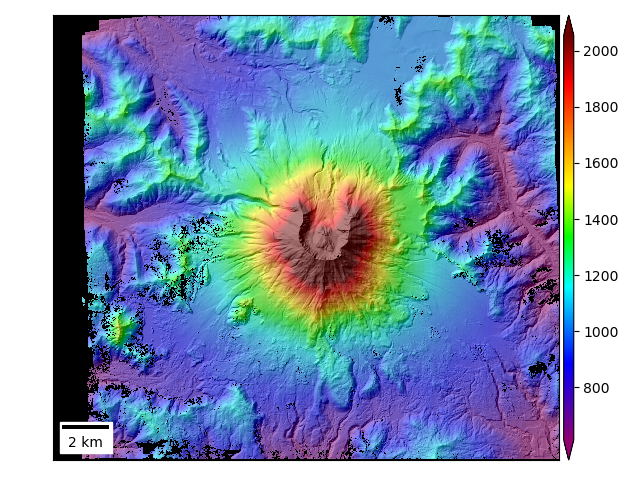

In [8]:
full_dem = os.path.join(data_dir,'mos_8m_all_toamask-tile-0.tif')
fig,ax = plt.subplots()
pltlib.iv_fn(full_dem,hillshade=True,ax=ax)

<IPython.core.display.Javascript object>


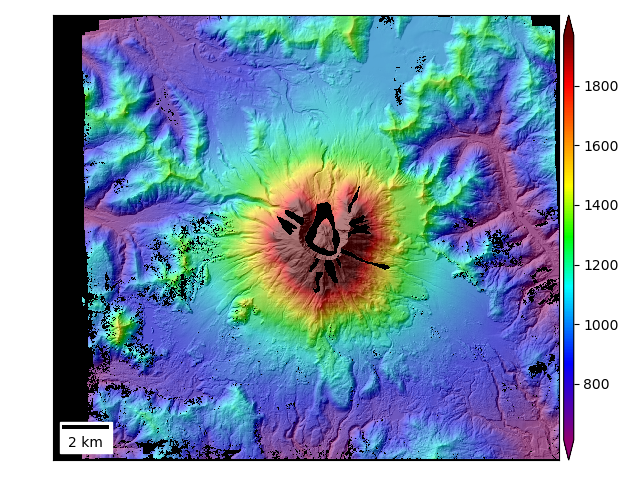

In [37]:
ref_dem = os.path.join(data_dir,'mos_8m_all_toamask-tile-0_non_glacierized.tif')
fig,ax = plt.subplots()
pltlib.iv_fn(ref_dem,hillshade=True,ax=ax)

In [33]:
skysat_coreg = find_executable('skysat_coreg.py')
skysat_coreg

'/home5/sbhusha1/sw/src/3d_stereo/scripts/skysat_coreg.py'

In [41]:
wv_peak_dem_static

'/nobackup/sbhusha1/skysat_video/paper_analysis/mgm_dg_peak_snow_static.tif'

In [42]:

outprefix = os.path.join(data_dir,'wv_dem_coreg_dir')
! dem_align.py  $ref_dem $wv_peak_dem_static -mode nuth -mask_list {'glaciers'}


Bad key "text.kerning_factor" on line 4 in
/nobackup/sbhusha1/sw/miniconda3/envs/bhushan_PY3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
proj_create: Error -38: failed to load datum shift file
proj_create: Error -38: failed to load datum shift file
proj_create: Error -38: failed to load datum shift file
proj_create: Error -38: failed to load datum shift file
proj_create: Error -38: failed to load datum shift file
proj_create: Error -38: failed to load datum shift file

Reference: /nobackup/sbhusha1/skysat_video/paper_analysis/mos_8m_all_toamask-tile-0_non_glacierized.tif
Source: /nobackup/sbhusha1/skysat_video/paper_analysis/mgm_dg_peak_snow_static.tif
Mode: nuth
Output: /nobackup/sbhusha1/skysat_video/paper_analysis/mgm_dg_peak_snow_static_dem_align/mgm_dg_peak_snow_s

0...10...20...30...40...50...60...70...80...90...100 - done.
2 of 2: [memory]
nl: 1592 ns: 1790 res: 5.000
0...10...20...30...40...50...60...70...80...90...100 - done.
Elevation difference stats for uncorrected input DEMs (src - ref)
Masking glaciers
Found glacier shp: /nobackup/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs 
Specified output srs: +proj=utm +zone=10 +datum=WGS84 +units=m +no_defs 
Generating final mask to use for reference surfaces, and applying to input DEM
Removing outliers
Initial pixel count:
874840
Absolute dz filter: 100.00
873529
Excluding values outside of range: -0.041 +/- 3*1.000
Excluding values outside of range: -3.039331 to 2.958032
754781
Computing slope
Slope filter: 0.10 - 40.00
Initial count: 561124
Excluding values outside of range: 0.100000 to 40.000000
536423
Computing aspect
Filtered difference map
count: 475833 min: -3.04 max: 2.96 mean: -0.06 std: 0.94 med: 0.02 mad: 0.71 q1: -0.51 q2: 0.4


Warping all inputs to the following:
Resolution: 5.0
Extent: [557993.1093226206, 5113719.396068813, 566943.0, 5121679.0]
Projection: '+proj=utm +zone=10 +datum=WGS84 +units=m +no_defs '
Resampling alg: cubic

1 of 2: [memory]
nl: 1592 ns: 1790 res: 5.000
0...10...20...30...40...50...60...70...80...90...100 - done.
2 of 2: [memory]
nl: 1592 ns: 1790 res: 5.000
0...10...20...30...40...50...60...70...80...90...100 - done.
Masking glaciers
Found glacier shp: /nobackup/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs 
Specified output srs: +proj=utm +zone=10 +datum=WGS84 +units=m +no_defs 
Generating final mask to use for reference surfaces, and applying to input DEM
Removing outliers
Initial pixel count:
874840
Absolute dz filter: 100.00
873523
Excluding values outside of range: -0.060 +/- 3*1.010
Excluding values outside of range: -3.090951 to 2.971566
755832
Computing slope
Slope filter: 0.10 - 40.00
Initial count: 561124
Excluding

<IPython.core.display.Javascript object>


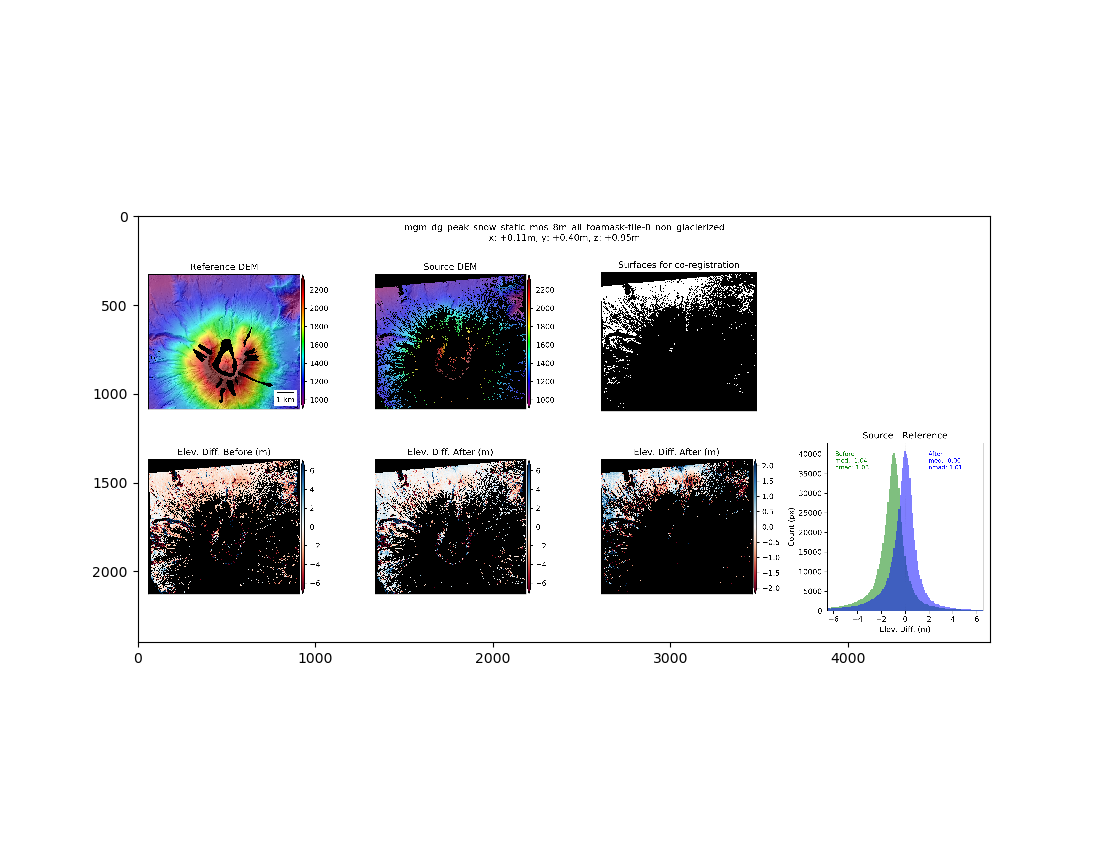

In [19]:
fig,ax = plt.subplots(figsize=(11,8.5))
img = plt.imread('/nobackup/sbhusha1/skysat_video/paper_analysis/mgm_dg_peak_snow_static_dem_align/mgm_dg_peak_snow_static_mos_8m_all_toamask-tile-0_non_glacierized_nuth_x+0.11_y+0.40_z+0.95_align.png')
ax.imshow(img)

<IPython.core.display.Javascript object>


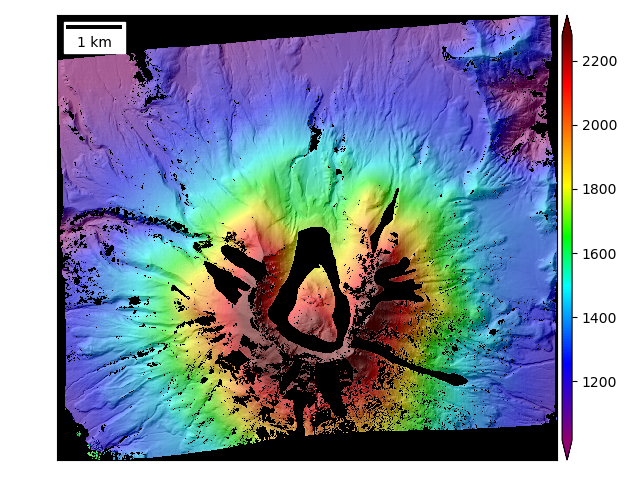

In [9]:
full_peak_dem = os.path.join(data_dir,'20190428_dg_mgm_peak_shpclip_shpclip.tif')
f,ax = plt.subplots()
pltlib.iv_fn(full_peak_dem,ax=ax,hillshade=True)

In [10]:
full_peak_dem = os.path.join(data_dir,'20190428_dg_mgm_peak_non_glacierized.tif')
full_peak_dem_ds = iolib.fn_getds(full_peak_dem)
src_dem_ds_align = iolib.mem_drv.CreateCopy('', full_peak_dem_ds, 0)
dx = +0.11
dy = +0.40
dz = +0.95
src_dem_ds_align = coreglib.apply_xy_shift(src_dem_ds_align, dx, dy, createcopy=False)
src_dem_ds_align = coreglib.apply_z_shift(src_dem_ds_align,dz,createcopy=False)

X shift:  0.11
Y shift:  0.4
Original geotransform: (557993.0, 2.0, 0.0, 5121679.0, 0.0, -2.0)
Updated geotransform: [ 5.5799311e+05  2.0000000e+00  0.0000000e+00  5.1216794e+06
  0.0000000e+00 -2.0000000e+00]
Z shift offset:  0.95


In [11]:
full_peak_dem_updated = os.path.splitext(full_peak_dem)[0]+f'_registered_dx_{dx}_dy_{dy}_dz_{dz}.tif'

In [12]:
iolib.writeGTiff(iolib.fn_getma(full_peak_dem), full_peak_dem_updated, src_dem_ds_align)

# Analyse and filter video DEMs based on NMAD and count metric

In [19]:
def filter_by_nmad(ds_list,min_count=4,max_nmad=4):
    dem = iolib.ds_getma(ds_list[0])
    count = iolib.ds_getma(ds_list[1])
    nmad = iolib.ds_getma(ds_list[2])
    
    nmad_filt = np.ma.masked_where(nmad>5,nmad)
    count_filt = np.ma.masked_where(count<2,count)
    valid_mask = malib.common_mask([nmad_filt,count_filt])
    nmad_filt_c = np.ma.array(nmad_filt,mask = valid_mask)
    count_filt_c = np.ma.array(count_filt,mask = valid_mask)
    dem_filt = np.ma.array(dem,mask = valid_mask)
    return dem_filt,nmad_filt_c,count_filt_c

In [20]:
def plot_video_out(ds_list):
    fig,ax = plt.subplots(1,3,sharex=True,sharey=True)
    pltlib.iv_ds(ds_list[0],hillshade=True,ax=ax[0],scalebar=False,full=True)
    pltlib.iv_ds(ds_list[2],cmap='inferno',ax=ax[2],scalebar=False,clim=(0,10),full=True)
    pltlib.iv_ds(ds_list[1],cmap='YlOrRd',ax=ax[1],scalebar=False,full=True)

In [138]:
import os

In [15]:
peak_video_fn_list = [os.path.join(data_dir,x) for x in ['20190420_median_mos.tif','20190420_count_mos.tif','20190420_nmad_mos.tif']]
fall_video_fn_list = [os.path.join(data_dir,x) for x in ['20191001_median_mos.tif','20191001_count_mos.tif','20191001_nmad_mos.tif']]

In [16]:
peak_video_ds_list = warplib.memwarp_multi_fn(peak_video_fn_list,r='lanczos')
fall_video_ds_list = warplib.memwarp_multi_fn(fall_video_fn_list,r='lanczos')


Warping all inputs to the following:
Resolution: 2.0
Extent: [560835.0, 5114965.0, 564217.0, 5117349.0]
Projection: '+proj=utm +zone=10 +datum=WGS84 +units=m +no_defs '
Resampling alg: lanczos

1 of 3: /nobackup/sbhusha1/skysat_video/paper_analysis/20190420_median_mos.tif
2 of 3: /nobackup/sbhusha1/skysat_video/paper_analysis/20190420_count_mos.tif
3 of 3: /nobackup/sbhusha1/skysat_video/paper_analysis/20190420_nmad_mos.tif

Warping all inputs to the following:
Resolution: 2.0
Extent: [559937.0, 5114377.0, 564257.0, 5117827.0]
Projection: '+proj=utm +zone=10 +datum=WGS84 +units=m +no_defs '
Resampling alg: lanczos

1 of 3: /nobackup/sbhusha1/skysat_video/paper_analysis/20191001_median_mos.tif
2 of 3: /nobackup/sbhusha1/skysat_video/paper_analysis/20191001_count_mos.tif
3 of 3: /nobackup/sbhusha1/skysat_video/paper_analysis/20191001_nmad_mos.tif


<IPython.core.display.Javascript object>


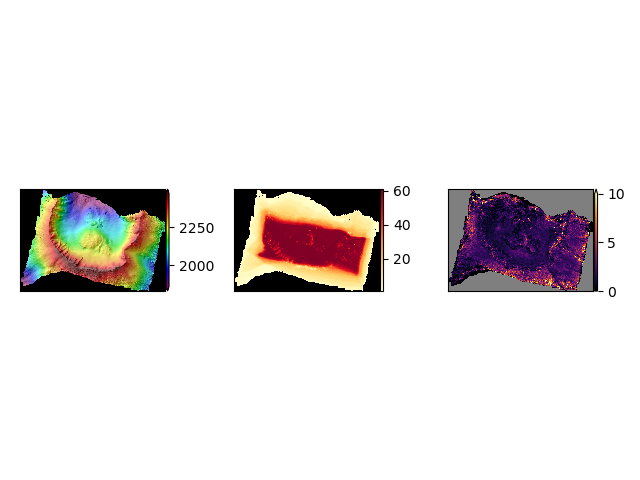

In [29]:
plot_video_out(peak_video_ds_list)

<IPython.core.display.Javascript object>


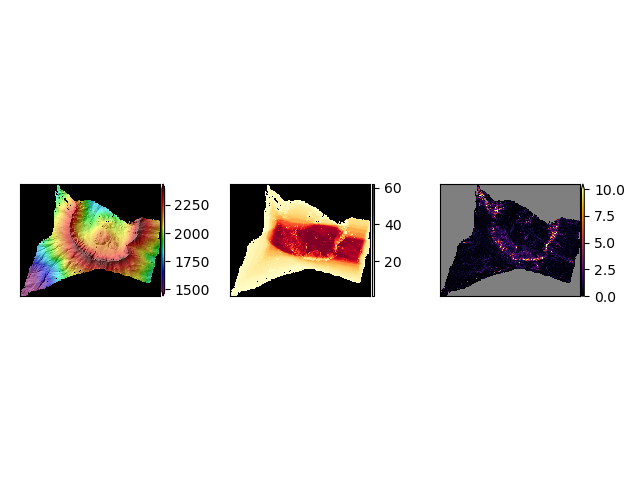

In [50]:
plot_video_out(fall_video_ds_list)

<IPython.core.display.Javascript object>


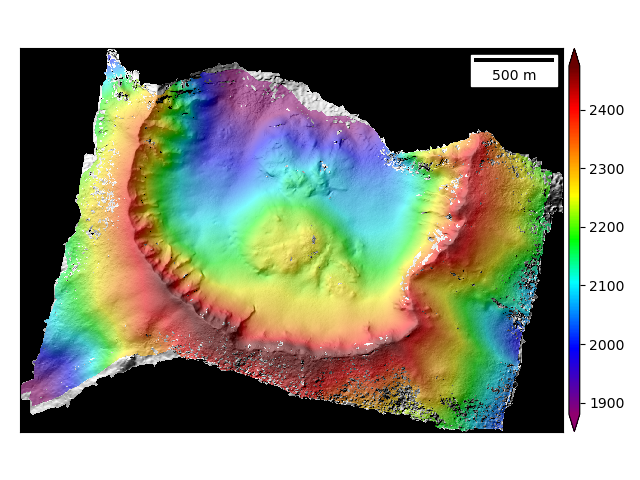

In [21]:
nmad = 5
count = 2
peak_dem_ma_filt,peak_nmad_filt,peak_count_filt = filter_by_nmad(peak_video_ds_list,min_count=count,max_nmad=nmad)
fig,ax = plt.subplots()
pltlib.iv(peak_dem_ma_filt,ds=peak_video_ds_list[0],hillshade=True,ax=ax)

In [22]:
malib.get_stats_dict(peak_nmad_filt)

{'count': 1200221,
 'min': 0.0,
 'max': 4.999431610107422,
 'ptp': 4.999431610107422,
 'mean': 1.7864293296202651,
 'std': 1.0426618591330925,
 'nmad': 0.9305443794250488,
 'med': 1.5680232048034668,
 'median': 1.5680232048034668,
 'p16': 0.8021097779273987,
 'p84': 2.8392369747161865,
 'spread': 1.018563598394394,
 'mode': 1.0656187534332275}

<IPython.core.display.Javascript object>


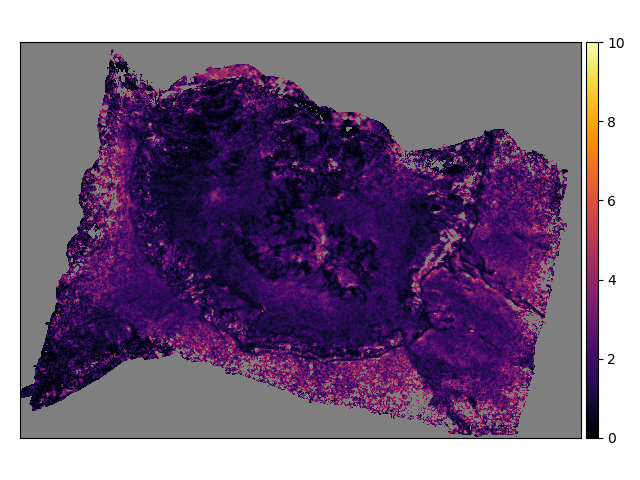

In [32]:
f,ax = plt.subplots()
pltlib.iv(peak_nmad_filt,cmap='inferno',ax=ax,clim=(0,10))

<IPython.core.display.Javascript object>


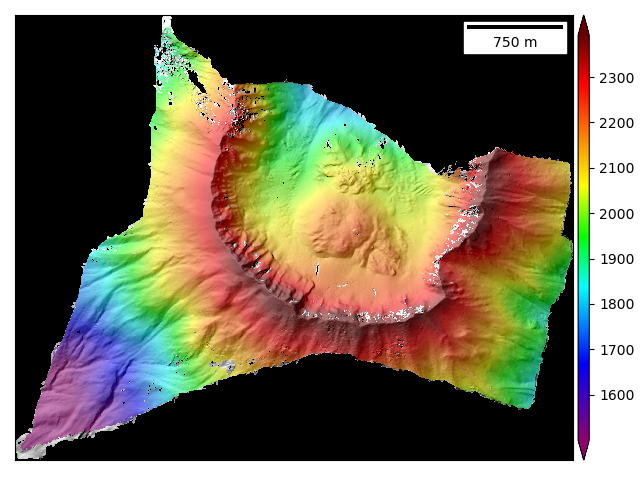

In [33]:
fall_dem_ma_filt,fall_nmad_filt,fall_count_filt = filter_by_nmad(fall_video_ds_list,min_count=count,max_nmad=nmad)
fig,ax = plt.subplots()
pltlib.iv(fall_dem_ma_filt,ds=fall_video_ds_list[0],hillshade=True,ax=ax)

In [34]:
malib.get_stats_dict(fall_nmad_filt)

{'count': 1816146,
 'min': 0.0,
 'max': 4.999431610107422,
 'ptp': 4.999431610107422,
 'mean': 0.7018282663739386,
 'std': 0.7449655560073675,
 'nmad': 0.32413432213068005,
 'med': 0.4415947198867798,
 'median': 0.4415947198867798,
 'p16': 0.21066240966320038,
 'p84': 1.1510419845581055,
 'spread': 0.47018978744745255,
 'mode': 0.26350897550582886}

- notice that the value over the artifacts are significantly eroded, which should result in a more reliable elevation difference map after coregistration.

In [23]:
peak_video_filtered = os.path.join(data_dir,f'20190420_median_mos_filt_max_nmad{nmad}_min_count{count}.tif')
fall_video_filtered = os.path.join(data_dir,f'20191001_median_mos_filt_max_nmad{nmad}_min_count{count}.tif')
iolib.writeGTiff(fall_dem_ma_filt,fall_video_filtered,fall_video_ds_list[0])
iolib.writeGTiff(peak_dem_ma_filt,peak_video_filtered,peak_video_ds_list[0])

# Coregister 2 Skysat video DEMs to the corresponding WV DEMs

In [28]:
# reference DEM for the 2 video DEMs
fall_ref = ref_dem
peak_ref = full_peak_dem_updated

In [29]:
peak_video = peak_video_filtered
fall_video = fall_video_filtered

In [30]:
ref_dem

'/nobackup/sbhusha1/skysat_video/paper_analysis/mos_8m_all_toamask-tile-0_non_glacierized.tif'

In [145]:
#pc_align = find_executable('')

In [31]:
peak_ref_dem_coreg_dir = os.path.join(data_dir,f'20190420_peak_filtered_correction_direc_updated_crater_trim_nmad{nmad}_count{count}')
fall_ref_dem_coreg_dir = os.path.join(data_dir,f'20191001_fall_filtered_correction_direc_updated_crater_trim_nmad{nmad}_count{count}')

In [34]:
! $skysat_coreg -mode classic_dem_align -refdem $peak_ref -source_dem $peak_video -max_displacement 40 -outprefix $peak_ref_dem_coreg_dir

proj_create: Error -38: failed to load datum shift file
proj_create: Error -38: failed to load datum shift file
proj_create: Error -38: failed to load datum shift file
proj_create: Error -38: failed to load datum shift file
proj_create: Error -38: failed to load datum shift file
proj_create: Error -38: failed to load datum shift file
<class 'str'>
point-to-plane
['/home5/sbhusha1/sw/StereoPipeline/bin/pc_align', '--alignment-method', 'point-to-plane', '--max-displacement', '40.0', '--highest-accuracy', '--save-transformed-source-points', '-o', '/nobackup/sbhusha1/skysat_video/paper_analysis/20190420_peak_filtered_correction_direc_updated_crater_trim_nmad5_count2', '/nobackup/sbhusha1/skysat_video/paper_analysis/20190428_dg_mgm_peak_non_glacierized_registered_dx_0.11_dy_0.4_dz_0.95.tif', '/nobackup/sbhusha1/skysat_video/paper_analysis/20190420_median_mos_filt_max_nmad5_min_count2.tif']
Maximum displacement is 38.8917
Saving aligned reference DEM at /nobackup/sbhusha1/skysat_video/paper_

In [43]:
! $skysat_coreg -mode classic_dem_align -refdem $fall_ref -source_dem $fall_video -max_displacement 130 -outprefix $fall_ref_dem_coreg_dir

proj_create: Error -38: failed to load datum shift file
proj_create: Error -38: failed to load datum shift file
proj_create: Error -38: failed to load datum shift file
proj_create: Error -38: failed to load datum shift file
proj_create: Error -38: failed to load datum shift file
proj_create: Error -38: failed to load datum shift file
<class 'str'>
point-to-plane
['/home5/sbhusha1/sw/StereoPipeline/bin/pc_align', '--alignment-method', 'point-to-plane', '--max-displacement', '130.0', '--highest-accuracy', '--save-inv-transformed-reference-points', '-o', '/nobackup/sbhusha1/skysat_video/paper_analysis/20191001_fall_filtered_correction_direc_updated_crater_trim_nmad5_count2', '/nobackup/sbhusha1/skysat_video/paper_analysis/20191001_median_mos_filt_max_nmad5_min_count2.tif', '/nobackup/sbhusha1/skysat_video/paper_analysis/mos_8m_all_toamask-tile-0_non_glacierized.tif']
Maximum displacement is 132.838
Saving aligned reference DEM at /nobackup/sbhusha1/skysat_video/paper_analysis/20191001_fal

In [44]:
fall_corrected_skysat_pc = fall_ref_dem_coreg_dir+'-trans_reference.tif'
fall_corrected_skysat_dem = os.path.splitext(fall_corrected_skysat_pc)[0]+'-DEM.tif'
peak_corrected_skysat_pc = peak_ref_dem_coreg_dir+'-trans_source.tif'
peak_corrected_skysat_dem = os.path.splitext(peak_corrected_skysat_pc)[0]+'-DEM.tif'

In [47]:
peak_corrected_skysat_dem

'/nobackup/sbhusha1/skysat_video/paper_analysis/20190420_peak_filtered_correction_direc_updated_crater_trim_nmad5_count2-trans_source-DEM.tif'

In [48]:
fall_corrected_skysat_dem

'/nobackup/sbhusha1/skysat_video/paper_analysis/20191001_fall_filtered_correction_direc_updated_crater_trim_nmad5_count2-trans_reference-DEM.tif'

In [45]:
ds_list = warplib.memwarp_multi_fn([fall_corrected_skysat_dem,peak_corrected_skysat_dem],r='lanczos')
fall_corrected_skysat_dem_ma = iolib.ds_getma(ds_list[0])
peak_corrected_skysat_dem_ma = iolib.ds_getma(ds_list[1])


Warping all inputs to the following:
Resolution: 2.0
Extent: [560835.0, 5114997.0, 564143.0, 5117341.0]
Projection: '+proj=utm +zone=10 +datum=WGS84 +units=m +no_defs '
Resampling alg: lanczos

1 of 2: /nobackup/sbhusha1/skysat_video/paper_analysis/20191001_fall_filtered_correction_direc_updated_crater_trim_nmad5_count2-trans_reference-DEM.tif
nl: 1172 ns: 1654 res: 2.000
2 of 2: /nobackup/sbhusha1/skysat_video/paper_analysis/20190420_peak_filtered_correction_direc_updated_crater_trim_nmad5_count2-trans_source-DEM.tif


<IPython.core.display.Javascript object>


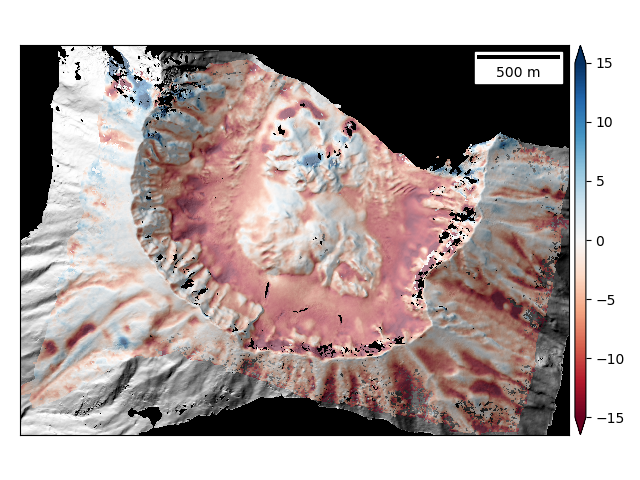

In [46]:
snow_depth = fall_corrected_skysat_dem_ma-peak_corrected_skysat_dem_ma
fig,ax = plt.subplots()
pltlib.iv(snow_depth,ds=ds_list[0],hillshade=True,cmap='RdBu',clim=(-15,15),ax=ax)

In [36]:
! $dem_align $peak_ref $peak_corrected_skysat_dem

proj_create: Error -38: failed to load datum shift file
proj_create: Error -38: failed to load datum shift file
proj_create: Error -38: failed to load datum shift file
proj_create: Error -38: failed to load datum shift file
proj_create: Error -38: failed to load datum shift file
proj_create: Error -38: failed to load datum shift file

Reference: /nobackup/sbhusha1/skysat_video/agu_analysis/DEM_new_wv_recent_registered_dx_0.11_dy_0.4_dz_0.95.tif
Source: /nobackup/sbhusha1/skysat_video/agu_analysis/peak_correction_direc-trans_source-DEM.tif
Mode: nuth
Output: /nobackup/sbhusha1/skysat_video/agu_analysis/peak_correction_direc-trans_source-DEM_dem_align/peak_correction_direc-trans_source-DEM_DEM_new_wv_recent_registered_dx_0.11_dy_0.4_dz_0.95


Warping all inputs to the following:
Resolution: 2.0
Extent: [560873.0, 5114989.0, 564137.0, 5117617.0]
Projection: '+proj=utm +zone=10 +datum=WGS84 +units=m +no_defs '
Resampling alg: cubic

1 of 2: /nobackup/sbhusha1/skysat_video/agu_analysis/DEM_

Generating final mask to use for reference surfaces, and applying to input DEM
Removing outliers
Initial pixel count:
956068
Absolute dz filter: 100.00
955133
Excluding values outside of range: 0.234 +/- 3*2.516
Excluding values outside of range: -7.312795 to 7.781057
803897
Computing slope
Slope filter: 0.10 - 40.00
Initial count: 1290745
Excluding values outside of range: 0.100000 to 40.000000
970907
Computing aspect
Filtered difference map
count: 668263 min: -7.31 max: 7.78 mean: 0.33 std: 2.30 med: -0.00 mad: 1.72 q1: -1.01 q2: 1.38 iqr: 2.39 mode: -0.47 p16: -1.55 p84: 2.35 spread: 1.95
Computing sub-pixel offset between DEMs using mode: nuth
Computing common mask
Initial sample count:
668263
Removing outliers
3-sigma filter: -25.54 - 25.80
662701
Computing 1-degree bin statistics: count
Computing 1-degree bin statistics: median
Computing fit
[ 0.02244923 -5.30244705  0.04330639]
Generating Nuth and Kaab plot
Median dz: -0.00
Nuth dz: 0.02
Incremental offset: dx=+0.00m, dy=-0.02m,

In [37]:
np.sqrt(2.51**2+1.72**2+1.01**2)

3.2060255769410198

## Plot of NMAD vs slope and count

In [ ]:
pea